# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (10)

**06/11/2023**

# `ALEJANDRO SÁNCHEZ MONZÓN`

# Neural Network Regression

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de **Boston**

In [4]:
# cargar el dataset de boston
df_boston = pd.read_csv("dataset_boston.csv", index_col=0)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Definimos los datos del modelo con todas las variables de entrada **menos la variable éticamente incorrecta**


In [5]:
X_multiple = df_boston.drop(['target', 'B'], axis='columns')
y_multiple = df_boston['target']

A pesar de que es una práctica común y recomendada, esta vez no modificamos la *[estructura de datos](https://scikit-learn.org/stable/glossary.html#term-array-like)* antes de pasarlo al modelo.

In [6]:
X_multiple

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [7]:
y_multiple

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [8]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

In [9]:
# Definimos una función que toma el valor de los hiperparámetros y 
# dibuja la evolución del rendimiento del modelo para el conjunto de training y de test: 
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

def curva_aprendizaje_red(capas_ocultas: tuple=(100,),
                         funcion_activacion: str='relu',
                         optimizador: str='adam'):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros de la red neuronal"""

    # Generar la estructura del modelo
    modelo_red = MLPRegressor(hidden_layer_sizes=capas_ocultas,
                              activation=funcion_activacion,
                              solver=optimizador,
                              random_state=222)
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(10,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_red.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_red.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_red.predict(X_test))

    print("La diferencia de R^2 entre training y test es= ", train_R2[-1]-test_R2[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.title('Curva de aprendizaje (Learning Curve) de la red neuronal')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


---

### **`Ejercicio 10.1`**

- **`10.1.1`** Realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search* y confirma los hiperparámetros obtenidos en la sesión, indicando:

  -            parametros = {"activation": ['relu', 'tanh'],
                             "solver": ['adam', 'lbfgs'],
                             "hidden_layer_sizes": list(itertools.product([80,100,120], repeat=3))} 

  - para `KFold`  >>>  `n_splits=5` y `random_state=111`  
  - para `MLPRegressor`  >>>  `random_state=222`


- **`10.1.2`** Consulta los hiperparámetros del modelo resultante y comprueba que coinciden con el mdelo correspondiente en la sesión.

In [10]:
## Solución
# Ejercicio 10.1.1
from sklearn.model_selection import GridSearchCV, KFold
import itertools

folds_10_1 = KFold(n_splits=5, shuffle=True, random_state=111)
red_10_1 = MLPRegressor(random_state=222)
params_10_1 = {
    "activation": ['tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "hidden_layer_sizes": list(itertools.product([80,100,120], repeat=3))
}

modelo_grid_10_1 = GridSearchCV(
    estimator=red_10_1,
    param_grid=params_10_1,
    cv=folds_10_1,
    n_jobs=-1,
)

In [11]:
modelo_grid_10_1.fit(X_train, y_train)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=MLPRegressor(random_state=222), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(80, 80, 80), (80, 80, 100),
                                                (80, 80, 120), (80, 100, 80),
                                                (80, 100, 100), (80, 100, 120),
                                                (80, 120, 80), (80, 120, 100),
                                                (80, 120, 120), (100, 80, 80),
                                                (100, 80, 100), (100, 80, 120),
                                                (100, 100, 80), (100, 100, 100),
                                                (100, 100, 120), (100, 120, 80),
                                                (100, 120, 100),
                                                (100, 120, 120), (120, 80, 80),
                                                (120, 80, 100), (120, 80, 120),
                                                (120, 100, 80), (120, 100, 100),
                                                (120, 100, 120), (120, 120, 80),
                                                (120, 120, 100),
                                                (120, 120, 120)],
                         'solver': ['lbfgs', 'adam']})

In [12]:
modelo_grid_10_1.best_estimator_

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100, 100),
             random_state=222, solver='lbfgs')

In [13]:
modelo_grid_10_1.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100, 100, 100),
 'solver': 'lbfgs'}

In [14]:
## Solución
# Ejercicio 10.1.2
print("Modelo inicial:", "{'activation': 'tanh', 'hidden_layer_sizes': (100, 120, 80), 'solver': 'lbfgs'}" )
print("Modelo 10.1:", modelo_grid_10_1.best_params_)

Modelo inicial: {'activation': 'tanh', 'hidden_layer_sizes': (100, 120, 80), 'solver': 'lbfgs'}
Modelo 10.1: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'lbfgs'}


---

### Dataset de **Advertising**

In [15]:
df_adv = pd.read_csv("Advertising.csv")
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
# Quitar los registros que contienen algún valor nulo y reestablecer los índices
df_adv = df_adv.dropna()
df_adv = df_adv.reset_index(drop=True)

In [17]:
# Definir las variables de entrada y la variable objetivo
X = df_adv.drop('Sales', axis='columns')
y = df_adv['Sales']

In [18]:
# Consultar los predictores del modelo a desarrollar
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
192,38.2,3.7,13.8
193,94.2,4.9,8.1
194,177.0,9.3,6.4
195,283.6,42.0,66.2


In [19]:
# Consultar la variable objetivo
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
192     7.6
193     9.7
194    12.8
195    25.5
196    13.4
Name: Sales, Length: 197, dtype: float64

In [20]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X, y, test_size=0.2, random_state=99)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.neural_network import MLPRegressor

red_neuronal_adv = MLPRegressor(random_state=123)

red_neuronal_adv.fit(X_train_adv, y_train_adv)

y_pred_adv = red_neuronal_adv.predict(X_test_adv)

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_adv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_adv)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_adv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_adv)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_adv))

Mean Absolute Error: 2.631825013124232
Mean Absolute Percentage Error: 22.080189214020294
Mean Squared Error: 12.329619156952386
Root Mean Squared Error: 3.5113557434347755
R^2 coefficient of determination: 0.5043364201591203


---

### **`Ejercicio 10.2`**

- **`10.2.1`** Realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search* indicando:

  -           parametros = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
                            "solver": ['lbfgs', 'sgd', 'adam'],
                            "hidden_layer_sizes": list(itertools.product([60,80,100], repeat=2))} 

  - para `KFold`  >>> `n_splits=10` y `random_state=111`  
  - para `MLPRegressor`  >>> `random_state=123`

- **`10.2.2`** **Consulta** los hiperparámetros del modelo resultante y **visualiza** los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.  

- **`10.2.3`** **Calcula** diferentes métricas para evaluar el modelo conseguido con los hiperparámetros óptimos y **analiza** su rendimiendo en comparación con el modelo inicial.
    - MAE
    - MAPE
    - MSE
    - RMSE
    - $R^2$    
          
- **`10.2.4`** Define una nueva función para sacar la gráfica del *Learning Curve* de los modelos ajustados a este dataset y aplícala para obtener la gráfica de aprendizaje del modelo inicial (la red con valores por defecto y `random_state=123`)  

- **`10.2.5`** Aplica la función definida en el paso anterior para sacar el *Learning Curve* que corresponde al modelo óptimo conseguido mediante _Grid Search_, analiza los resultados y **explica** si este modelo tiene preferencia o no. 

In [22]:
## Solución
# Ejercicio 10.2.1
from sklearn.model_selection import GridSearchCV, KFold

folds_10_2 = KFold(n_splits=10, shuffle=True, random_state=111)
red_10_2 = MLPRegressor(random_state=123)
params_10_2 = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam'],
    "hidden_layer_sizes": list(itertools.product([60,80,100], repeat=2))
}

modelo_grid_10_2 = GridSearchCV(
    estimator=red_10_2,
    param_grid=params_10_2,
    scoring='r2',
    cv=folds_10_2,
    n_jobs=-1,
)

In [23]:
modelo_grid_10_2.fit(X_train_adv, y_train_adv)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in 

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=MLPRegressor(random_state=123), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(60, 60), (60, 80), (60, 100),
                                                (80, 60), (80, 80), (80, 100),
                                                (100, 60), (100, 80),
                                                (100, 100)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2')

In [24]:
y_pred_10_2 = modelo_grid_10_2.predict(X_test_adv)

In [25]:
## Solución
# Ejercicio 10.2.2
modelo_grid_10_2.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (80, 60), 'solver': 'lbfgs'}

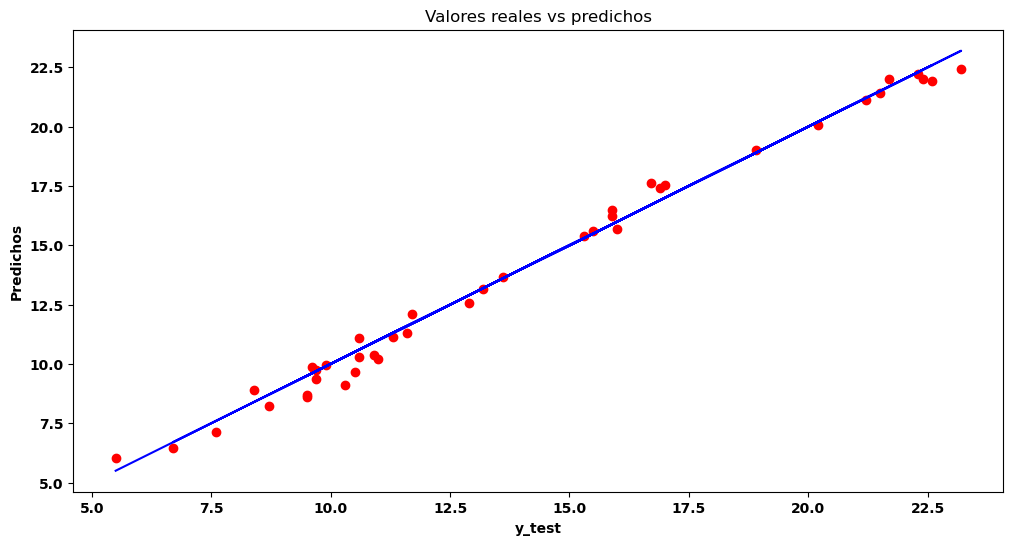

In [26]:
plt.scatter(y_test_adv, y_pred_10_2, color = 'red')
plt.plot(y_test_adv, y_test_adv, color = 'blue')
plt.title('Valores reales vs predichos')
plt.xlabel('y_test')
plt.ylabel('Predichos')
plt.show()

In [27]:
## Solución
# Ejercicio 10.2.3
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_10_2))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_10_2) * 100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_10_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_10_2)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_10_2))

Mean Absolute Error: 0.40509792281553986
Mean Absolute Percentage Error: 3.48115046750649
Mean Squared Error: 0.24630341900063552
Root Mean Squared Error: 0.49628965232073446
R^2 coefficient of determination: 0.9900983450636378


> #### Explicación 10.2.3
> Tras obtener las métricas de este modelo podemos llegar a la conclusión de este es **muy superior** a lo que era el modelo inicial, con uan **diferencia de casi 0.5** en coeficiente de R2.
>
> Este modelo tiene un porcentaje de error muy bajo e comparación al inicial, hablando de un porcentaje de acierto de casi el **97% para el modelo del ejercicio** frente a un 88% (aproximadamente) en el modelo inicial.
>
> Otros valores como MAE, MSE o RMSE son tambien **nototiramente más bajos**. Hablamos de valores que en ninguno de los casos superan un valor de 0.5, mientras que en el modelo inicial ninguno es capaz de bajar de 1.

In [28]:
## Solución
# Ejercicio 10.2.4  
def curva_aprendizaje_red_10_2(capas_ocultas: tuple=(100,),
                         funcion_activacion: str='relu',
                         optimizador: str='adam'):

    modelo_red = MLPRegressor(hidden_layer_sizes=capas_ocultas,
                              activation=funcion_activacion,
                              solver=optimizador,
                              random_state=123)
    num_samples = np.linspace(10,X_train_adv.shape[0]).astype(int)

    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo_red.fit(X_train_adv[:num_samples[i]], y_train_adv[:num_samples[i]])

        train_R2[i] = r2_score(y_train_adv[:num_samples[i]], modelo_red.predict(X_train_adv[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test_adv, modelo_red.predict(X_test_adv))

    print("La diferencia de R^2 entre training y test es =", train_R2[-1]-test_R2[-1])

    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.title('Curva de aprendizaje (Learning Curve) de la red neuronal')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

La diferencia de R^2 entre training y test es = -0.0027532659508647805


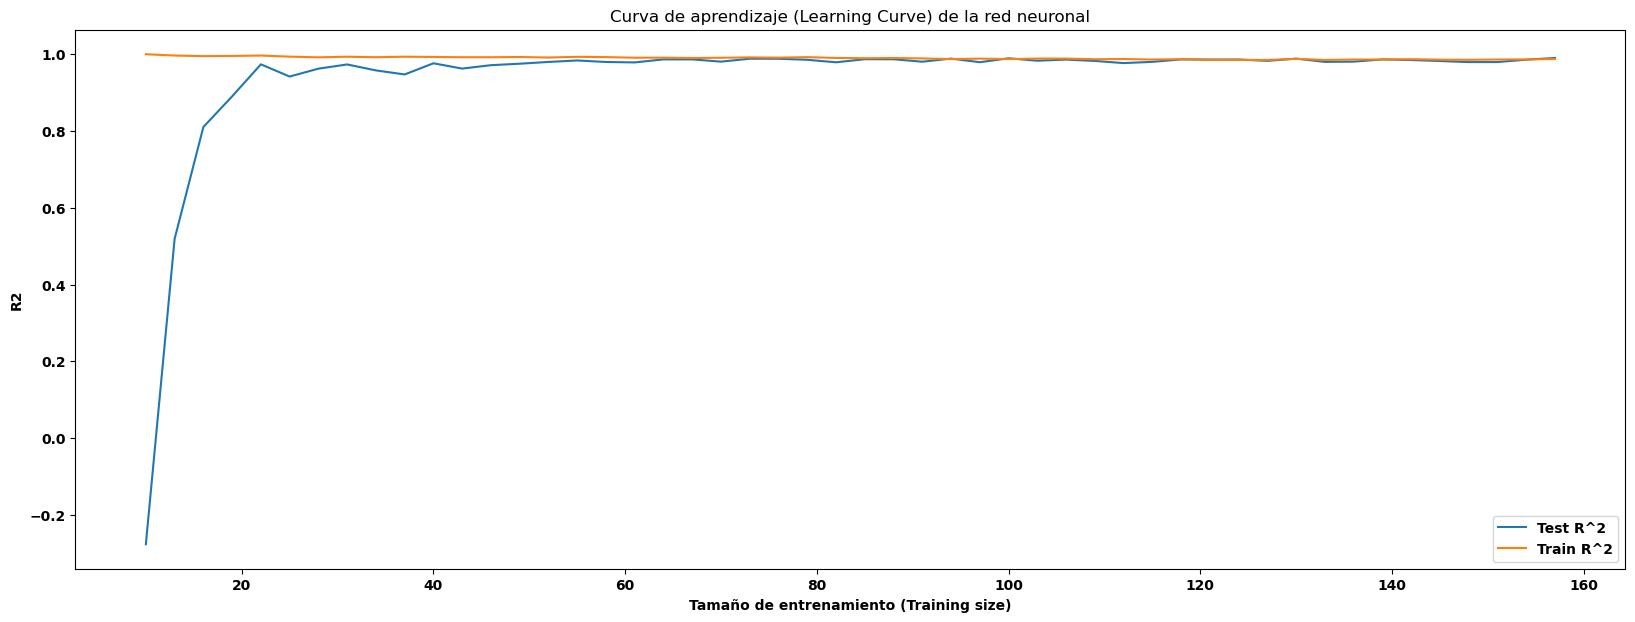

In [29]:
## Solución
# Ejercicio 10.2.5
curva_aprendizaje_red_10_2(
    capas_ocultas=modelo_grid_10_2.best_estimator_.hidden_layer_sizes,
    optimizador=modelo_grid_10_2.best_estimator_.solver,
    funcion_activacion=modelo_grid_10_2.best_estimator_.activation,
)

> #### Explicación 10.2.4
> Esta gráfica nos muestra una curva de aprendizaje muy interesante. Podemos observar como inicialmente, para valores de "Training size", la gráfica tiene **una tendencia ascendente**, pero rapidamente **va perdiendo el tamaño del gap que hay entre train y test**, no es una diferencia muy marcada, todo lo contrario, este gap se reduce hasta llegar a **un nivel de convergencia** que no solo se mantiene según aumentan los valores de "Training size", sino que **poco a poco va convergiendo más y más**.
>
> En todo momento podemos ver que el **coeficiente de R2** que refleja la gráfica es **bastante alto**, para cuando el gap se reduce, y empiezan a converger ambas lineas en la gráfica, nos movemos entro de valores para R2 que no bajan de 0.85 siquiera, aunque este dato es meramente intuitivo, ya que habría que seguir analizando el resto de métricas.
>
> En conclusión, considero que este es un **muy buen modelo**, y para mi, si podría ser **un modelo preferente**, ya que ha quedado reflejado que **no es un modelo que sufra de Underfitting**, y que segun avanza en su tamaño, sigue desmotrando tener resultados muy interesantes (y competentes).